Atividade 01 da disciplina de Visão Robótica

Discente: Henrique Antônio Guanais Corneau

## Questao 1
Reduza uma imagem de uma escala 𝑘 < 1 utilizando a tecnica do o
vizinho mais proximo, utilizando a media dos vizinhos

Para a implementação desse algoritmo, primeiro é necessário calcular o novo tamanho da imagem com base na escala e com essa informação calcular o tamanho da janela que será utilizada para que seja calculada a média dos vizinhos.
```
new_shape = (int(img.shape[0]*escala), int(img.shape[1]*escala), 3)
img_reduzida = np.zeros(new_shape, dtype=np.uint8)
janela_x = img.shape[0] / new_shape[0]
janela_y = img.shape[1] / new_shape[1]
```

Após isso, irá ser percorrido cada pixel da nova imagem, definindo a posição inicial e final da região com base na janela calculada anteriormente. 
```
for i in range(new_shape[0]):
    for j in range(new_shape[1]):
        x = int(i * janela_x)
        x_final = int((i + 1) * janela_x)
        y = int(j * janela_y)
        y_final = int((j + 1) * janela_y)
```
Além disso, é necessário garantir que o valor do pixel não ultrapasse o tamanho da imagem, apenas colocando uma condição de que, se isso acontecer, o valor da coordenada será o tamanho da dimensão da imagem - 1.
```
if x_final > img.shape[0]:
    x_final = img.shape[0] - 1
if y_final > img.shape[1]:
    y_final = img.shape[1] - 1
```


A região dos vizinhos será então atribuida, pegando todos os pixels da coordenada `x`até `x_final`, e de `y` até `y_final`.
```
regiao = img[x:x_final, y:y_final]
```
Por fim, será calculado a média dos valores desses pixels, tanto com o eixo x quanto para o eixo y, utilizando o comando `np.mean()`, e atribuir esse valor ao pixel da imagem redimensionada.
```
img_reduzida[i, j] = np.mean(regiao, axis=(0, 1))
```


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

A imagem foi reduzida de: (512, 512, 3) para: (51, 51, 3)
Janela: 10.03921568627451x10.03921568627451


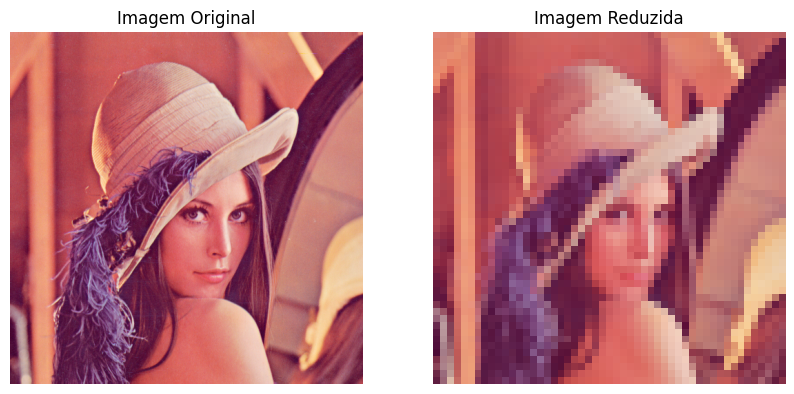

In [7]:
def reduzir_imagem(img, escala):
    # calcula o novo tamanho, baseado na escala
    new_shape = (int(img.shape[0]*escala), int(img.shape[1]*escala), 3)
    img_reduzida = np.zeros(new_shape, dtype=np.uint8)
    # define o tamanho da janela para a media dos pixels
    janela_x = img.shape[0] / new_shape[0]
    janela_y = img.shape[1] / new_shape[1]

    print(f"A imagem foi reduzida de: {img.shape} para: {img_reduzida.shape}")
    print(f"Janela: {janela_x}x{janela_y}")

    for i in range(new_shape[0]):
        for j in range(new_shape[1]):
            # posicao inicial e final dos pixels, baseado na janela
            x = int(i * janela_x)
            x_final = int((i + 1) * janela_x)
            y = int(j * janela_y)
            y_final = int((j + 1) * janela_y)
            # condicao para o valor do pixel nao ultrapassar o tamanho da imagem
            if x_final > img.shape[0]:
                x_final = img.shape[0] - 1
            if y_final > img.shape[1]:
                y_final = img.shape[1] - 1
            
            regiao = img[x:x_final, y:y_final]
            # calcula a media dos pixels da regiao
            img_reduzida[i, j] = np.mean(regiao, axis=(0, 1))
    # plot das imagens
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.axis('off')
    plt.title('Imagem Original')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    plt.subplot(122)
    plt.title('Imagem Reduzida')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_reduzida, cv2.COLOR_BGR2RGB))
    plt.show()

img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path)
escala = 0.1

reduzir_imagem(img, escala)


## Questao 2
Aumente uma imagem de uma escala 𝑘 >=1 real usando interpolação
de ordem zero e ordem 1


Para essa questão, começando primeiramente pela interpolação de ordem zero, primeiro deve ser criada a imagem com a nova resolução, igual ao passo feito na questão anterior, logo após, será percorrida a imagem nova, e será feito o remapeamento da imagem original para a imagem redimensionada utilizando a função `round()`, em que garante que os valores irão ser arredondados para o pixel mais próximo.
```
for i in range(new_shape[0]):
    for j in range(new_shape[1]):
        x = round(i/escala)
        y = round(j/escala)
```
Logo após, é utilizado a mesma condicional para evitar que o pixel ultrapasse o tamanho da imagem, e então a atribuição é feita para os novos pixels da imagem redimensionada.
```
img_aumentada[i, j] = img[x, y]
```


A imagem foi aumentada de: (512, 512, 3) para: (1740, 1740, 3)


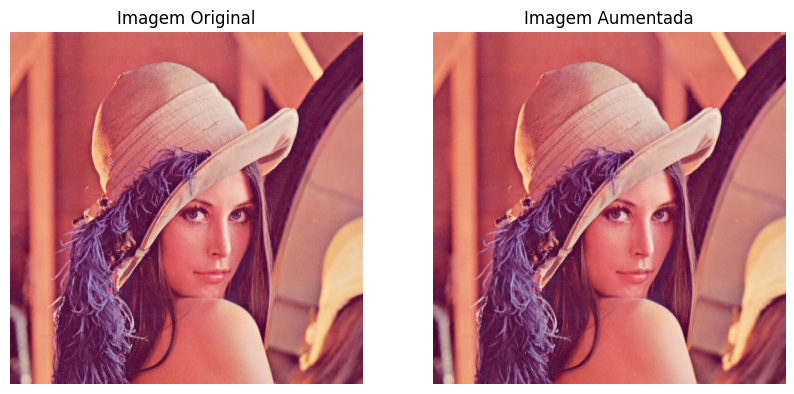

In [8]:
# aumentar utilizando interpolacao de ordem zero
def aumentar_imagem_ordem_zero(escala, img):
    # nova dimensao da imagem baseado na escala
    new_shape = (int(img.shape[0]*escala), int(img.shape[1]*escala), 3)
    img_aumentada = np.zeros(new_shape, dtype=np.uint8)

    print(f"A imagem foi aumentada de: {img.shape} para: {img_aumentada.shape}")

    for i in range(new_shape[0]):
        for j in range(new_shape[1]):
            # faz o remapeamento dos pixels da imagem original, arredondando para o pixel mais proximo
            x = round(i/escala)
            y = round(j/escala)
            # condicao para o valor do pixel nao ultrapassar o tamanho da imagem
            if x >= img.shape[0]:
                x = img.shape[0] - 1
            if y >= img.shape[1]:
                y = img.shape[1] - 1

            img_aumentada[i, j] = img[x, y]
    # plot das imagens
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.title('Imagem Original')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    plt.subplot(122)
    plt.title('Imagem Aumentada')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_aumentada, cv2.COLOR_BGR2RGB))
    plt.show()

    # cv2.imwrite('imagem_original.png', img)
    # cv2.imwrite('imagem_aumentada.png', img_aumentada)

img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path)
escala = 3.4

aumentar_imagem_ordem_zero(escala, img)


Para realizar a interpolação de ordem um, ou interpolação bilinear, deve ser criado a imagem com a nova resolução com base na escala, depois percorrer cada pixel da nova imagem, pegando a coordenada dos 4 pixels mais próximos do pixel de interesse.
```
for i in range(new_shape[0]):
    for j in range(new_shape[1]):
        # calcula a posicao dos 4 pixels mais proximos
        x0 = int(i/escala)
        x1 = x0 + 1
        y0 = int(j/escala)
        y1 = y0 + 1
```
Posteriormente, deverá ser feita a condição para que o valor do pixel não ultrapasse a imagem, depois disso deverá ser calculado a distância entre os pixels, para poder então ser aplicado na fórmula de interpolação bilinear.
```
dx = x1 - x0
dy = y1 - y0
img_aumentada[i, j] = (1-dx)*(1-dy)*img[x0, y0] + dx*(1-dy)*img[x1, y0] + (1-dx)*dy*img[x0, y1] + dx*dy*img[x1, y1]
```

A imagem foi aumentada de: (512, 512, 3) para: (1740, 1740, 3)


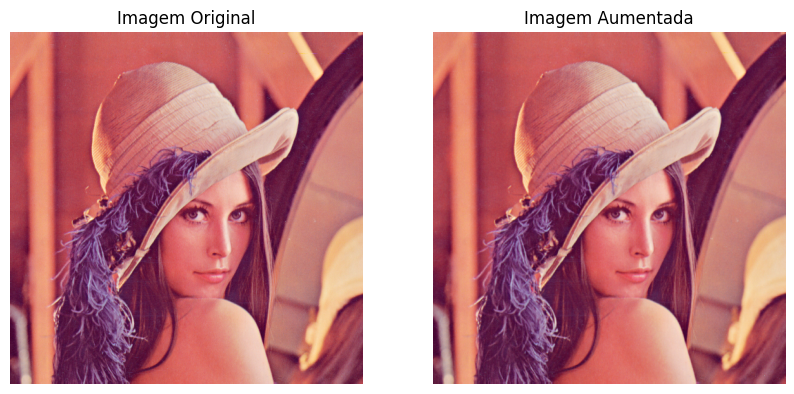

In [9]:
# aumentar a resolucao utilizando interpolacao de ordem um
def aumentar_imagem_ordem_um(escala, img):
    # nova dimensao da imagem baseado na escala
    new_shape = (int(img.shape[0]*escala), int(img.shape[1]*escala), 3)
    img_aumentada = np.zeros(new_shape, dtype=np.uint8)

    print(f"A imagem foi aumentada de: {img.shape} para: {img_aumentada.shape}")

    for i in range(new_shape[0]):
        for j in range(new_shape[1]):
            # calcula a posicao dos 4 pixels mais proximos
            x0 = int(i/escala)
            x1 = x0 + 1
            y0 = int(j/escala)
            y1 = y0 + 1
            # condicao para o valor do pixel nao ultrapassar o tamanho da imagem
            if x1 >= img.shape[0]:
                x1 = img.shape[0] - 1
            if y1 >= img.shape[1]:
                y1 = img.shape[1] - 1
            # valor da diferencao entre os pixels
            dx = x1 - x0
            dy = y1 - y0
            # aplicacao da formula de interpolacao bilinear
            img_aumentada[i, j] = (1-dx)*(1-dy)*img[x0, y0] + dx*(1-dy)*img[x1, y0] + (1-dx)*dy*img[x0, y1] + dx*dy*img[x1, y1]
    # plot das imagens
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.title('Imagem Original')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    plt.subplot(122)
    plt.title('Imagem Aumentada')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_aumentada, cv2.COLOR_BGR2RGB))
    plt.show()

    # cv2.imwrite('imagem_original.png', img)
    # cv2.imwrite('imagem_aumentada2.png', img_aumentada)

img_path = 'imagens/Lenna.png'
img = cv2.imread(img_path)
escala = 3.4
    
aumentar_imagem_ordem_um(escala, img)